# Supervised Logistic Regression on Iris dataset

#### Importing python libraries and modules of numpy and pandas

In [39]:
# Importing the libraries
import pandas as pd
import numpy as np

# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Import scikit-Learn module for the algorithm/modeL: Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import scikit-Learn module classification report to later use for information about how the system try to classify / lable each record
from sklearn.metrics import classification_report

#### Loading the dataset - Iris.csv

* Title: Iris plants dataset
* Number of instances: 150, 50 in each of three classes
* Number of preditors: 4 numeric, predictive attributes and the class

In [21]:
# Specify location of the dataset
filename = 'iris.csv'

# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

#### Preprocessing the dataset

* The following columns cannot contain 0 (zero) values.
* i.e., 0 values are invalid in these columns
* It they exist, we need to mark them as missing value or numpy.NaN

1. Set The results shows
2. Get the first five records 
3. Get the summary statistics of the numeric variables/attributes of the dataset

In [22]:
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm ' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)

# count the number of NaN values in each column
print (df.isnull().sum())

Id                0
SepalLengthCm     0
SepalWidthCm      0
PetalLengthCm     0
PetalWidthCm      0
Species           0
PetalLengthCm     0
dtype: int64


#### Performing EDA on the dataset

* for each numberic variable/attribute of the dataset (VIP NOTES: The first variable ID is also plotted.
* 5 numberic variables --> at least 5 plots --> Layout (2, 3): 2 rows, each row with 3 plots), boxplot, and scatter plot matrix

In [23]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print(df.shape)

(150, 7)


In [24]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species            object
PetalLengthCm     float64
dtype: object


In [25]:
#return the first five records / rows of the data set
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   PetalLengthCm   
0             1.4  
1             1.4  
2             1.3  
3             1.5  
4             1.4  


In [26]:
#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000       1.600000      0.300000   
50%     75.500000       5.800000      3.000000       4.350000      1.300000   
75%    112.750000       6.400000      3.300000       5.100000      1.800000   
max    150.000000       7.900000      4.400000       6.900000      2.500000   

       PetalLengthCm   
count      150.000000  
mean         3.758667  
std          1.764420  
min          1.000000  
25%          1.600000  
50%          4.350000  
75%          5.100000  
max          6.900000  


In [27]:
#class distribution i.e. how many records are in each class
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


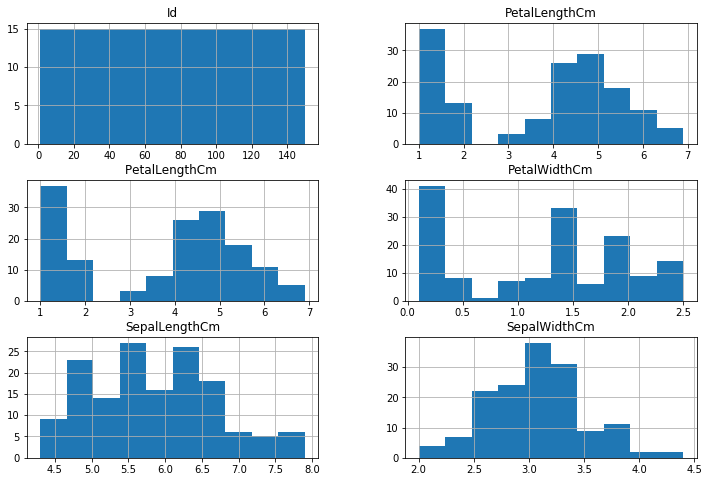

In [28]:
#plot histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
pyplot.show()

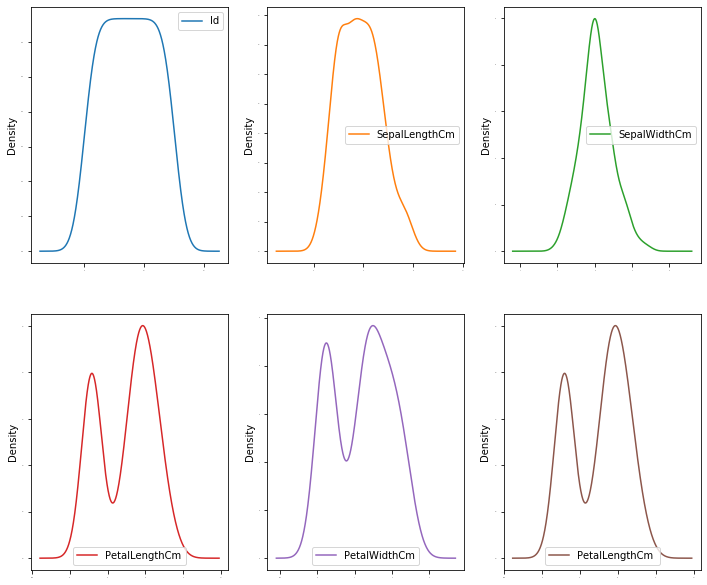

In [29]:
# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

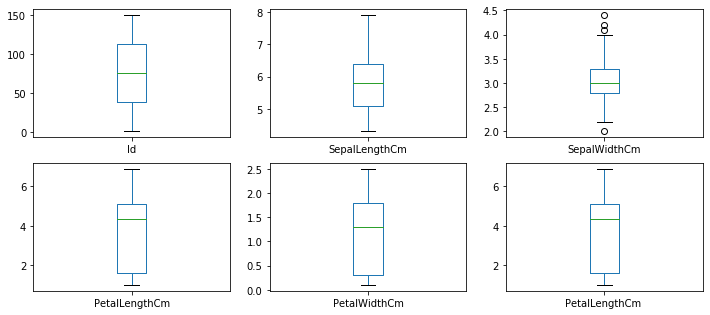

In [30]:
# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()

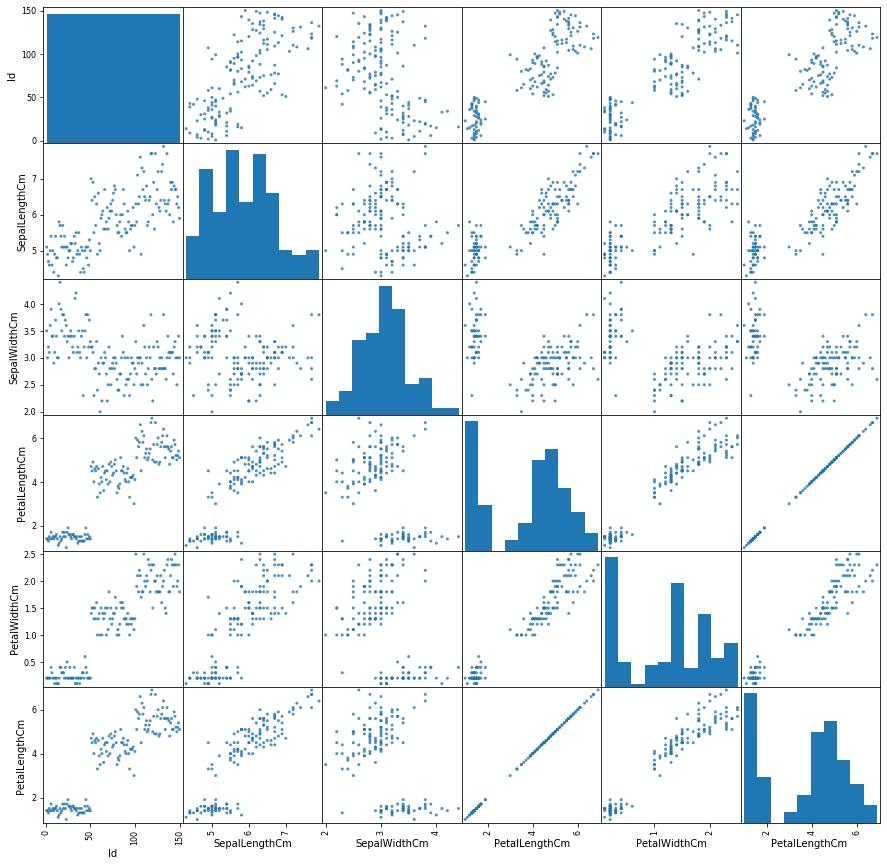

In [31]:
# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

#### Seperating dataset into Input & Output NumPy arrays

* Training data Set (X) consist of the independent variables or predictors
* Desired Output (Y) consist of the dependent variable or that which we are trying to predict

In [32]:
# store dataframe values into a numpy array
array = df.values

# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 5 (6 - 1)
# these are the independent variables or predictors
X = array[:,1:5]

# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

#### Split Input / Output arrays into training / testing datasets

In [33]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33

#selection of records to include in each data sub-dataset must be done randomly
seed = 7

#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

#### Building and training the model

In [34]:
#build the model
model = LogisticRegression()

# train the model using the training sub-dataset
model.fit(X_train, Y_train)

#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)

print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89        18
 Iris-virginica       0.89      0.89      0.89        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



* The precision is the ratio tp / (tp + fp) --> where tp is the number of true positives and fp the number of false positives, the precision represents the ability of the classifier not to label a positive sample as negative
* The recall is the ratio tp / (tp + fn) --> where tp is the number of true positives and fn the number of false negatives, the recall represents the ability of the classifier to find all the positive samples
* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall --> where an F-beta score reaches its best value at 1 and worst score at 0
* The F-beta score weights recall more than precision by a factor of beta, beta == 1.0 means recall and precision are equally important
* The support is the number of occurrences of each class in y_true

#### Score the accuracy of the model

In [35]:
#score the accuracy leve
result = model.score(X_test, Y_test)

#printing out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


#### Classify / Predict Model

In [36]:
model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)

* So, the model predict that the flower type of the new record is Iris-virginica
* Based on the model's accuracy score: there is 90% chance that this new record is a Iris-virginica

#### Evaluate the model using the 10-fold cross-validation technique.

In [38]:
# evaluate the algorythm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# split the whole dataset into folds
'''In k-fold cross-validation, the original sample is randomly partitioned into k equal sized
subsamples. Of the k subsamples, a single subsample is retained as the validation data for
testing the model, and the remaining k − 1 subsamples are used as training data. The crossvalidation process is then repeated k times, with each of the k subsamples used exactly once as
the validation data. The k results can then be averaged to produce a single estimation. The
advantage of this method over repeated random sub-sampling is that all observations are used for
both training and validation, and each observation is used for validation exactly once'''
kfold = KFold(n_splits, random_state=seed)

# for logistic regression, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'

# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# print the evaluationm results
# result: the average of all the results obtained from the K-fold cross validation
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.947 (0.058)


C:\Users\rvkot\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\rvkot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rvkot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

* Using the 10-fold cross-validation to evaluate the model / algorithm, the accuracy of this logistic regression
model is 88%
* Above, the model predict that the flower type of the new record is Iris-virginica.
* Based on the model's accuracy score obtained from the model evaluation using 10-told cross-validation: There is 88% chance that this new record is an Iris-virginica